In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Q2.Perform the following preprocessing tasks on the dirty_iris data set ii.

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/dirty_iris.csv')
print(data)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0             6.4          3.2           4.5          1.5  versicolor
1             6.3          3.3           6.0          2.5   virginica
2             6.2          NaN           5.4          2.3   virginica
3             5.0          3.4           1.6          0.4      setosa
4             5.7          2.6           3.5          1.0  versicolor
..            ...          ...           ...          ...         ...
145           6.7          3.1           5.6          2.4   virginica
146           5.6          3.0           4.5          1.5  versicolor
147           5.2          3.5           1.5          0.2      setosa
148           6.4          3.1           NaN          1.8   virginica
149           5.8          2.6           4.0          NaN  versicolor

[150 rows x 5 columns]


i) Calculate the number and percentage of observations that are complete.

In [ ]:
n=len(data.dropna())
print("Number of observations that are completed: ",n)
print("Percentage of observations that are completed: ",n/len(data)*100,"%")

Number of observations that are completed:  96
Percentage of observations that are completed:  64.0 %


ii) Replace all the special values in data with NA.

In [ ]:
data.fillna(value="NA",inplace=True)
print(data)

    Sepal.Length Sepal.Width Petal.Length Petal.Width     Species
0            6.4         3.2          4.5         1.5  versicolor
1            6.3         3.3            6         2.5   virginica
2            6.2          NA          5.4         2.3   virginica
3              5         3.4          1.6         0.4      setosa
4            5.7         2.6          3.5           1  versicolor
..           ...         ...          ...         ...         ...
145          6.7         3.1          5.6         2.4   virginica
146          5.6           3          4.5         1.5  versicolor
147          5.2         3.5          1.5         0.2      setosa
148          6.4         3.1           NA         1.8   virginica
149          5.8         2.6            4          NA  versicolor

[150 rows x 5 columns]


iii) Define these rules in a separate text file and read them.
(Use edit file function in R (package edit rules). Use similar function in Python). 

Print the resulting constraint object.

–Species should be one of the following values: 

setosa,versicolor or virginica. 

–All measured numerical properties of an iris should be positive.

–The petal length of an iris is at least 2 times its petal width.

–The sepal length of an iris cannot exceed 30cm.

–The sepals of an iris are longer than its petals.


In [ ]:
%cd /content/gdrive/MyDrive
#!pwd
import q2ruleset as rs


/content/gdrive/MyDrive


iv) Determine how often each rule is broken(violated Edits).

In [46]:
data=pd.read_csv('/content/gdrive/MyDrive/dirty_iris.csv')
data.dropna(inplace=True)
result=rs.ruleset(data)

print("Number of voilations by iris:")
print(len(result)-sum(result))
result=pd.DataFrame(result)

Number of voilations by iris:
0      0
1      0
3      0
4      0
7      0
      ..
143    0
144    0
145    0
146    0
147    0
Length: 96, dtype: int64


Also summarize and plot the result.


In [47]:
print("Summmary:")
print(result.describe())

Summmary:
         0     1     3     4     7     8    ...   142   143   144   145   146   147
count      8     8     8     8     8     8  ...     8     8     8     8     8     8
unique     1     1     1     1     1     1  ...     1     1     1     1     1     1
top     True  True  True  True  True  True  ...  True  True  True  True  True  True
freq       8     8     8     8     8     8  ...     8     8     8     8     8     8

[4 rows x 96 columns]


Text(0, 0.5, 'True/False')

<Figure size 1440x7200 with 0 Axes>

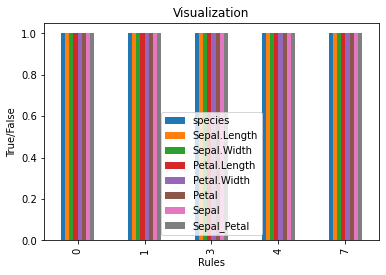

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize = [20, 100])
result.transpose().head().astype(int).plot(kind='bar')
plt.title("Visualization")
plt.xlabel('Rules')
plt.ylabel('True/False')

v) Find outliers in sepal length using boxplot and boxplot.stats

{'boxes': [<matplotlib.lines.Line2D at 0x7f0d6b092b90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0d6b0a7c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d6b0adc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d6b0ad710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0d6b0a7190>,
  <matplotlib.lines.Line2D at 0x7f0d6b0a76d0>]}

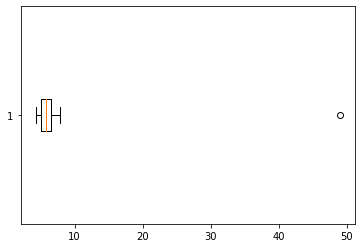

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(data['Sepal.Length'],vert=False)